# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [3]:
print('Shape of Training Sets')
print('x_train =', x_train.shape)
print('y_train =', y_train.shape)

print(' ')
print('Shape of Test Sets')
print('x_test =', x_test.shape)
print('y_test =', y_test.shape)

print(' ')
print('Dimensions of the Images')
print(x_test.shape[1], 'x', x_test.shape[2])

print(' ')
print('Number of Classes')
print(len(class_names))



Shape of Training Sets
x_train = (50000, 32, 32, 3)
y_train = (50000, 1)
 
Shape of Test Sets
x_test = (10000, 32, 32, 3)
y_test = (10000, 1)
 
Dimensions of the Images
32 x 32
 
Number of Classes
100


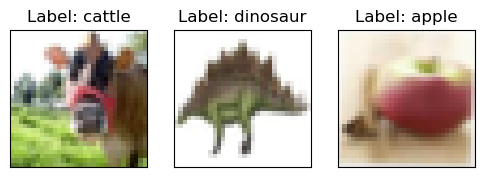

In [4]:
import numpy as np
import matplotlib.pyplot as plt

random_indices = np.random.choice(x_train.shape[0], 3, replace=False)

fig, axes = plt.subplots(1, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], interpolation='nearest')
    ax.set_title(f"Label: {class_names[y_train[i][0]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [6]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [8]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                7

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [9]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# I picked categorical crossentropy as my loss function as it is commonly used for multi-class classification problems and it's designed to measure
# the difference between our predicted class probbalities and our one-hot encoded labels.
# For the optimizer, I picked Adam as it converges faster and is noramlly used for image classifications.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

loss, accuracy = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

# I tried 10 epochs as a starting point which seemed to be a good choice as you can see my accuracy stabilizing at around 7 epochs. I'm still getting an accuracy of 28.31% which is not great.

Epoch 1/10
1250/1250 [==============================] - 20s 16ms/step - loss: 3.8865 - accuracy: 0.1050 - val_loss: 3.5830 - val_accuracy: 0.1463
Epoch 2/10
1250/1250 [==============================] - 18s 15ms/step - loss: 3.4344 - accuracy: 0.1734 - val_loss: 3.4062 - val_accuracy: 0.1838
Epoch 3/10
1250/1250 [==============================] - 18s 15ms/step - loss: 3.2177 - accuracy: 0.2138 - val_loss: 3.2196 - val_accuracy: 0.2125
Epoch 4/10
1250/1250 [==============================] - 20s 16ms/step - loss: 3.0723 - accuracy: 0.2398 - val_loss: 3.1015 - val_accuracy: 0.2298
Epoch 5/10
1250/1250 [==============================] - 21s 17ms/step - loss: 2.9619 - accuracy: 0.2603 - val_loss: 3.0004 - val_accuracy: 0.2582
Epoch 6/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.8739 - accuracy: 0.2779 - val_loss: 2.9573 - val_accuracy: 0.2671
Epoch 7/10
1250/1250 [==============================] - 19s 15ms/step - loss: 2.8033 - accuracy: 0.2886 - val_loss: 2.9764 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy', Precision(), Recall()]
)

loss, accuracy, precision, recall = model.evaluate(x_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')

# Accuracy: 28.31%
# Other metric: Precision and Recall
# Reason for selection: Since my accuracy was so low, I opted for 2 more metrics to really see what was going on. Both precision and recall seemed like
#                       a good place to start
# Value of metric: Precision - 65.05%
#                  Recall - 10.35%
# Interpretation of metric value: Precision was higher than I expected given my low accuracy, but it's good to know that the model is getting more than
#                                 half of it's positive predictions right. Recall was way lower than expected, which is not great since this represents
#                                 the actual number of positives that were identified correctly. 

313/313 [==============================] - 5s 10ms/step - loss: 2.8583 - accuracy: 0.2831 - precision: 0.6505 - recall: 0.1035
Loss:     2.86
Accuracy: 28.31%
Precision: 65.05%
Recall: 10.35%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

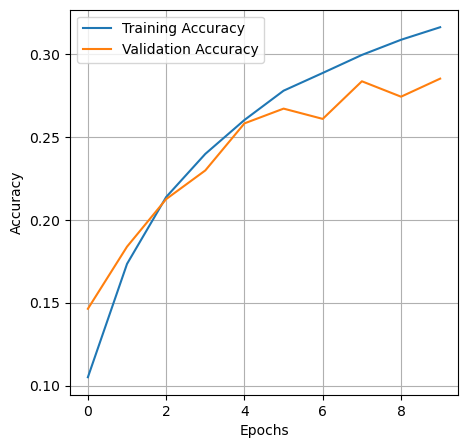

In [13]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

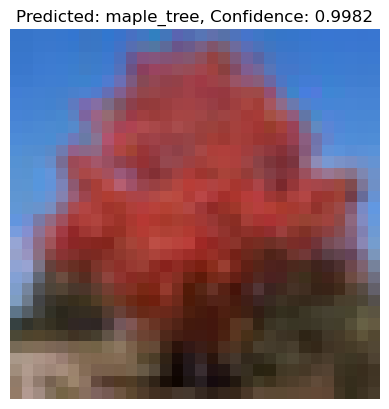

In [14]:
import tensorflow as tf

# Correctly classified/most confident sample

predictions_tf = model(x_test)
predicted_values_tf = tf.reduce_max(predictions_tf, axis=1)

most_confident_index_tf = tf.argmax(predicted_values_tf).numpy()
most_confident_sample_tf = x_test[most_confident_index_tf]
most_confident_label_tf = np.argmax(y_test[most_confident_index_tf])

plt.imshow(most_confident_sample_tf)
plt.title(f"Predicted: {class_names[most_confident_label_tf]}, Confidence: {predicted_values_tf[most_confident_index_tf]:.4f}")
plt.axis('off')
plt.show()


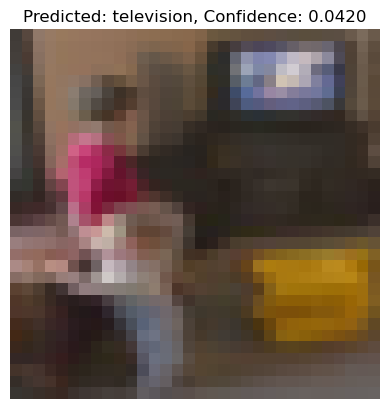

In [15]:
# Incorrectly classified/least confident sample

predictions_tf = model(x_test)
predicted_values_tf = tf.reduce_max(predictions_tf, axis=1)

least_confident_index_tf = tf.argmin(predicted_values_tf).numpy()
least_confident_sample_tf = x_test[least_confident_index_tf]
least_confident_label_tf = np.argmax(y_test[least_confident_index_tf])

plt.imshow(least_confident_sample_tf)
plt.title(f"Predicted: {class_names[least_confident_label_tf]}, Confidence: {predicted_values_tf[least_confident_index_tf]:.4f}")
plt.axis('off')
plt.show()


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [19]:
enhanced_model = models.Sequential()

enhanced_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
enhanced_model.add(layers.MaxPooling2D((2, 2)))
enhanced_model.add(layers.Conv2D(64, (3, 3), activation='relu',))
enhanced_model.add(layers.MaxPooling2D((2, 2)))
enhanced_model.add(layers.Flatten())
enhanced_model.add(layers.Dropout(0.5))
enhanced_model.add(layers.Dense(32, activation='relu'))
enhanced_model.add(layers.Dense(100, activation='softmax'))

enhanced_model.summary()

# I chose to add a dropout layer because it's effective when a model has a large amount of parameters, this one has 96,452.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 2304)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2304)             

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [20]:
enhanced_model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy', Precision(), Recall()]
)

history = enhanced_model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=1
)

enhanced_loss, enhanced_accuracy, enhanced_precision, enhanced_recall = enhanced_model.evaluate(x_test, y_test)

print('Enhanced Model Performance:')
print(f'Loss:     {enhanced_loss:.2f}')
print(f'Accuracy: {enhanced_accuracy*100:.2f}%')
print(f'Precision: {enhanced_precision*100:.2f}%')
print(f'Recall: {enhanced_recall*100:.2f}%')

Epoch 1/10
1250/1250 [==============================] - 22s 16ms/step - loss: 4.0967 - accuracy: 0.0727 - precision_4: 0.4457 - recall_4: 0.0010 - val_loss: 3.6794 - val_accuracy: 0.1390 - val_precision_4: 0.6800 - val_recall_4: 0.0034
Epoch 2/10
1250/1250 [==============================] - 18s 15ms/step - loss: 3.5590 - accuracy: 0.1573 - precision_4: 0.6092 - recall_4: 0.0145 - val_loss: 3.3382 - val_accuracy: 0.1976 - val_precision_4: 0.6831 - val_recall_4: 0.0222
Epoch 3/10
1250/1250 [==============================] - 19s 15ms/step - loss: 3.3141 - accuracy: 0.2001 - precision_4: 0.6481 - recall_4: 0.0327 - val_loss: 3.1741 - val_accuracy: 0.2327 - val_precision_4: 0.7066 - val_recall_4: 0.0419
Epoch 4/10
1250/1250 [==============================] - 20s 16ms/step - loss: 3.1526 - accuracy: 0.2287 - precision_4: 0.6594 - recall_4: 0.0494 - val_loss: 3.0117 - val_accuracy: 0.2622 - val_precision_4: 0.6999 - val_recall_4: 0.0625
Epoch 5/10
1250/1250 [==============================] - 

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

In [21]:
loss, accuracy, precision, recall = model.evaluate(x_test, y_test)

print('Original Model Performance:')
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision*100:.2f}%')
print(f'Recall: {recall*100:.2f}%')

enhanced_loss, enhanced_accuracy, enhanced_precision, enhanced_recall = enhanced_model.evaluate(x_test, y_test)

print('Enhanced Model Performance:')
print(f'Loss:     {enhanced_loss:.2f}')
print(f'Accuracy: {enhanced_accuracy*100:.2f}%')
print(f'Precision: {enhanced_precision*100:.2f}%')
print(f'Recall: {enhanced_recall*100:.2f}%')

# As you can see below, adding a dropout layer slightly increased my performance which is better than nothing! I think dropping half of the neurons
# helped simplify the model and enhanced performance.

# There is definitley room for improvements! I feel like my model may be overfitting so I would like to try out more techniques to help with that.

313/313 [==============================] - 3s 9ms/step - loss: 2.8583 - accuracy: 0.2831 - precision: 0.6505 - recall: 0.1035
Original Model Performance:
Loss:     2.86
Accuracy: 28.31%
Precision: 65.05%
Recall: 10.35%
313/313 [==============================] - 3s 8ms/step - loss: 2.6858 - accuracy: 0.3266 - precision_4: 0.7384 - recall_4: 0.1160
Enhanced Model Performance:
Loss:     2.69
Accuracy: 32.66%
Precision: 73.84%
Recall: 11.60%


## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.